In [1]:
import pandas as pd
import pickle
from datetime import datetime
import numpy  as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('ipl.csv')

In [3]:
df.head(5)

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,18-04-2008,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,18-04-2008,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,18-04-2008,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,18-04-2008,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,18-04-2008,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222


In [4]:
columns_to_remove=['mid','batsman','bowler','striker','non-striker','venue']
df.drop(labels=columns_to_remove,axis=1,inplace=True)

In [5]:
df=df[df.overs>=5]

In [6]:
df.bat_team.unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians', 'Deccan Chargers', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Delhi Daredevils',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant'], dtype=object)

In [7]:
Consistenly_playing_team=['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Delhi Daredevils',
        'Sunrisers Hyderabad']

In [8]:
df=df[(df['bat_team'].isin(Consistenly_playing_team))]
df=df[(df['bowl_team'].isin(Consistenly_playing_team))]

In [9]:
print(df.bowl_team.unique())
print(df.bat_team.unique())

['Royal Challengers Bangalore' 'Kings XI Punjab' 'Delhi Daredevils'
 'Rajasthan Royals' 'Mumbai Indians' 'Chennai Super Kings'
 'Kolkata Knight Riders' 'Sunrisers Hyderabad']
['Kolkata Knight Riders' 'Chennai Super Kings' 'Rajasthan Royals'
 'Mumbai Indians' 'Kings XI Punjab' 'Royal Challengers Bangalore'
 'Delhi Daredevils' 'Sunrisers Hyderabad']


In [10]:
df['date']=df['date'].apply(lambda x:datetime.strptime(x,'%d-%m-%Y'))

In [11]:
df

,date,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
32,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,0,5.1,59,0,222
33,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.2,59,1,222
34,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.3,59,1,222
35,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.4,59,1,222
36,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.5,58,1,222
...,...,...,...,...,...,...,...,...,...
75884,2017-05-19,Kolkata Knight Riders,Mumbai Indians,106,9,18.1,29,4,107
75885,2017-05-19,Kolkata Knight Riders,Mumbai Indians,107,9,18.2,29,4,107
75886,2017-05-19,Kolkata Knight Riders,Mumbai Indians,107,9,18.3,28,4,107
75887,2017-05-19,Kolkata Knight Riders,Mumbai Indians,107,9,18.4,24,4,107


In [12]:
df=pd.get_dummies(data=df,columns=['bat_team','bowl_team',])


In [13]:
X=df.drop(columns='total',axis=1)
y=df['total']

In [14]:
X_train=X[X.date.dt.year<=2016]
X_test=X[X.date.dt.year>2016]
y_train=df[df.date.dt.year<=2016]['total']
y_test=df[df.date.dt.year>2016]['total']


In [15]:
X_train.drop(columns='date',axis=1,inplace=True)
X_test.drop(columns='date',axis=1,inplace=True)

In [16]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [17]:
ridge=Ridge()
parameters={'alpha':[1e-15,1e-10,1e-5,1e-2,2,4,6,8,10]}
gcv=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)
gcv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-05, 0.01, 2, 4, 6, 8, 10]},
             scoring='neg_mean_squared_error')

In [18]:
predict=gcv.predict(X_test)

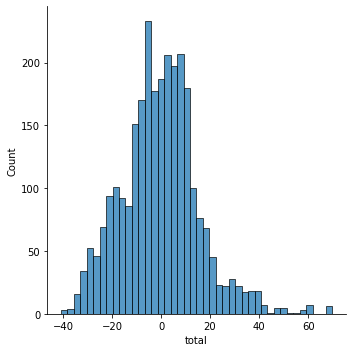

In [19]:
sns.displot(predict-y_test)

In [23]:
file=open('ipl_prediction.pkl','wb')
pickle.dump(gcv,file)

In [21]:
X_train

,runs,wickets,overs,runs_last_5,wickets_last_5,bat_team_Chennai Super Kings,bat_team_Delhi Daredevils,bat_team_Kings XI Punjab,bat_team_Kolkata Knight Riders,bat_team_Mumbai Indians,...,bat_team_Royal Challengers Bangalore,bat_team_Sunrisers Hyderabad,bowl_team_Chennai Super Kings,bowl_team_Delhi Daredevils,bowl_team_Kings XI Punjab,bowl_team_Kolkata Knight Riders,bowl_team_Mumbai Indians,bowl_team_Rajasthan Royals,bowl_team_Royal Challengers Bangalore,bowl_team_Sunrisers Hyderabad
32,61,0,5.1,59,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
33,61,1,5.2,59,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
34,61,1,5.3,59,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
35,61,1,5.4,59,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
36,61,1,5.5,58,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68857,194,7,19.2,54,4,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
68858,200,7,19.3,56,4,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
68859,201,7,19.4,56,4,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
68860,202,7,19.5,57,4,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
